# Signals and samples

<div class="alert alert-block alert-info">

This is a jupyter notebook. The notebook consists of text and code cells.
Each code cell can be run by clicking on the cell (gray box), before clicking the
play-button on the top of the page or pressing "shift + enter".

The code cells contain small programs written in the programming language Python.
We are going to use these programs to study the relation between signal frequencies and sampling rates.
You don't need any prerequisite programming knowledge for doing these tasks.
Follow the instructions and ask the TAs for help whenever you have questions.

<div class="alert alert-block alert-info">
You will work in groups of two or three.

Start by making a copy of this file: Click on File; Make a copy.
Change the name of the file to: FamilynameFirstname_FamilynameFirstname_FamilynameFirstname_computinglab1.ipynb 
If your group consist of Harry Potter, Kristine Bonnevie and Isaac Newton, the filename should be: PotterHarry_BonnevieKristine_NewtonIsaac_computinglab1.ipynb

This file should be handed in on CANVAS under Computational Lab 1: Neurosimulation

## Reconstructing a sentence
Any sentence can be completely expressed by
a set of letters. But what if there are some letters missing from a sentence,
can we still read its content? Can we be sure that we correctly reconstruct the
original sentence from the incomplete sentence?


We will now load an unknown sentence from the text file `sentence.txt`.
Do not look at the its content yet, we want to see how many letters we
can remove and still be able to read it.

In [120]:
# loading the sentence
sentence = open('sentence.txt', 'r').read()

To be able to delete letters in a systematic way, we convert the sentence to a
list. Then we can use the function named `del` to delete content.

To only remove some of the characters, we use the the slicing notation together with the `del` function. `[::2]`, for example, means that we access every other character, `[::3]` means we access every third character, and so on. Applied together with the `del`function, this means that we remove every other or every third character. So if we have a string variable such as `some_phrase = 'HelloKai"`, and apply `del(some_phrase[::3])`, this will remove one "l" and the "K", such that you end up with `some_phrase = 'Heloai'`. Now you will do the same with the loaded sentence. 

When you execute the cell below, you will see the sentence you end up with after deleting every other character.

In [6]:
# Converting sentence to a list
sampled_sentence = list(sentence)

# Setting the slicing_number
slicing_number = 2

del(sampled_sentence[::slicing_number])
# Put the sentence back together as a readable string
''.join(sampled_sentence)

'lvtr r rlin.Imgigt tn eealtl ogr h odtigaotrdn na lvtra  rw-pi htnbd usin ybigi h lvtr ooysset eo utrdn h lvtr  oklk ’ n fteohr.'

<!-- --- begin exercise --- -->

## Exercise 1: Discussion

In your groups, try to determine what the sentence says.
If you can't make sense of it, try increasing the variable named `slicing_number` one step at a time and rerun the cell.


**a)**
Do you come up with different answers?
When does the sentence go from unreadable to readable?


Discuss what may happen if you try to reconstruct
the sentence with too many letters missing.



<!-- Closing remarks for this Exercise -->

### Remarks:

When you are unsure of what the sentence say, or you have two equally likely
answers, we can say that the sentence is impossible to reconstruct from the
sampled sentence.

Once you're done experimenting with the slicing number you can check what the true sentence is by erasing the hashtag in the cell below and running it.


<!-- --- end exercise --- -->

## Reconstructing a signal

What's the connection between reconstructing sentences and signal analysis? Well, when you record something, for example in the next lab on measuring muscle contraction, and convert the measured signal to the digital form that's readable for computers, you can't have an infinite number of samples. You have to settle for a finite number of measurements. This means that you are inevitably going to lose some parts of the original, true signal.

The question then becomes: How often do you have to perform measurements to be sure that you haven't lost any vital information? This is what we'll be working on in this lab. But first, some background on the differences between the original, physical signal and the digital signal on your computer.

In [7]:
# We begin by importing some packages that can help us analyse and visualize data. Remember to run this cell before
# you run any of the cells further down

from pylab import *
from scipy import signal
import librosa
import librosa.display
import IPython.display as ipd
%matplotlib inline
rcParams['figure.figsize'] = (7, 5)

In the physical world signals are continuous. No matter how much you zoom in on a signal, the parts of the signal are still connected. This is sometimes referred to as an analog signal. Digital signals, on the other hand, are dicontinuous, or discretized. This means that they are composed of a series of discrete bits, and if you zoom in close enough you can see (or hear) that these bits are separated.

To illustrate this, we will use a recording of a drummer.

Run the cell below and press play to listen to the drum recording.

In [8]:
# load a WAV file
filename = 'simpleLoop.wav'

ipd.Audio(filename) 

Since we are playing this recording on a computer, the signal from the drum recording has already been digitized. Let's see what this digital signal looks like. Run the next two cells below to plot the amplitude of the signal over time.

In [9]:
sound_drums, sample_rate_drums = librosa.load(filename)
n_samples_drums = len(sound_drums)
duration_drums = len(sound_drums) / sample_rate_drums
time_drums = linspace(0, duration_drums, n_samples_drums)

Text(0, 0.5, 'Amplitude')

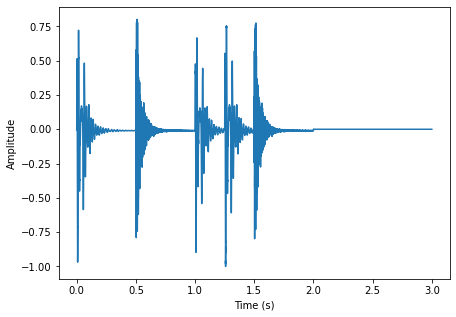

In [10]:
plot(time_drums, sound_drums)
xlabel('Time (s)')
ylabel('Amplitude')

As you can see there are large deflections at each beat, and there seems to be two different types of deflections. That's because the two different drums produce a distinctive signature in the signal. We'll get back to this later. For now we'll see what happens when we try to zoom in on the signal. 

You can alter what part of the signal you look at by changing the limits of the x-axis in the line that says `xlim` in the cell below. Try different values of the second number in `xlim` down to, say, 0.001.

Text(0, 0.5, 'Amplitude')

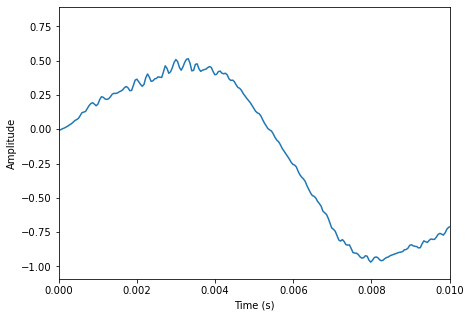

In [11]:
plot(time_drums, sound_drums)

xlim([0, 0.01])

xlabel('Time (s)')
ylabel('Amplitude')

How would you characterize the signal? Continuous or discrete? It still looks continuous, right?
That's because the `plot` function draws a line between each sample of the signal.

* We can turn this behavior off and only show each measured value (sample) of the signal by changing the `'-'` to `'.'` in the first line in the next cell. 
* If you also limit the part of the graph you look at enough, that is, reduce the second number in `xlim([0, 0.1])`, you will eventually see that the signal is made up of many, separate, dots.

Text(0, 0.5, 'Amplitude')

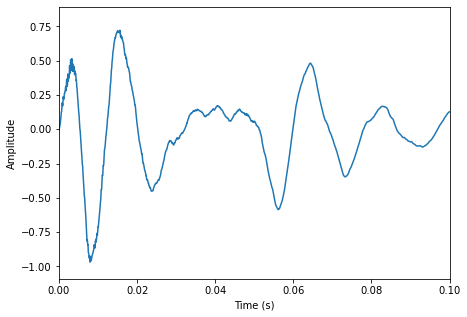

In [12]:
plot(time_drums, sound_drums, '-')
xlim([0, 0.1])
xlabel('Time (s)')
ylabel('Amplitude')

Now we're going to see (or rather, hear) what happens when we sample at different rates, which means to adjust how often you measure from the signal.

Try changing the variable named `sampling_number` in the first line below and play the sampled recording. Remember to run the cell over again each time you change the slicing number. Note that unlike what we did for the letters, we're not deleting the points (letters earlier) at each slice now.

In [15]:
sampling_number = 4
sound_drums_sampled = sound_drums[::sampling_number]
ipd.Audio(sound_drums_sampled, rate=len(sound_drums_sampled) / duration_drums)

## Exercise 2: 

Can you explain what happened above? Try using the term "<u>sampling rate</u>" in your explanation, and one or two sentences should be enough.

**Hint:** It can be helpful to use the plotting cell below under "**Plotting sampled sound**", and be liberal with your sampling number.

Answer:

#### Plotting sampled sound

Text(0, 0.5, 'Amplitude')

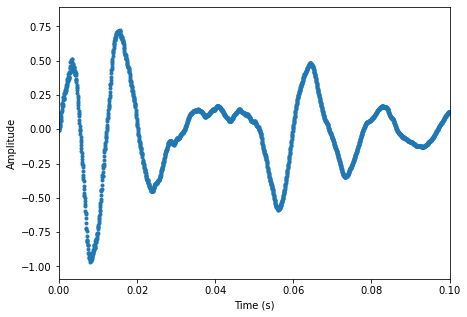

In [16]:
time_for_sampled = np.linspace(0,duration_drums,len(sound_drums_sampled))

plot(time_for_sampled, sound_drums_sampled, '.')
xlim([0, 0.1])
xlabel('Time (s)')
ylabel('Amplitude')

## Representing a signal as frequencies

In the following we'll try to figure out how to determine how often you should sample to be sure that you don't lose important information in the signal, and also learn how any you can decompose a measured signal into a sum of sinusoids at different frequencies.

Before we continue, it is recommended that you watch the segment from about <u>0:50 to 2:30</u> in this video by 3Blue1Brown. If you don't have headphones or ear plugs with you, just watch it with subtitles.
<!-- dom:MOVIE: [https://www.youtube.com/watch?v=spUNpyF58BY] -->
<!-- begin movie -->

In [17]:
from IPython.display import HTML
_s = """
<iframe width="640" height="365" src="https://www.youtube.com/embed/spUNpyF58BY" frameborder="0" allowfullscreen></iframe>
"""
HTML(_s)

<!-- end movie -->


The method we use to perform the decomposition described in the video is called the Fourier transform. The Fourier transform splits the signal into sinusoids of different frequencies, where the amplitude of these sinusoids represents how much there is of the respective frequency in the signal. This decomposition is based on an important property of continuous signals, which is that a continuous signal can always be represented as a sum of sinusoids of different frequencies.

Later on we'll see how this translates to discretized signals and sampling frequencies, but first we need to make our own signal from a sum of sinusoids.

## Example: Making a signal
We can make a sinusoid signal by using the `sin` function. We start by determining how many samples pr. second the signal is going to have (that is, how many dots per second if we think of it in terms of the illustration earlier).

In [16]:
sample_rate_orig = 10000 # sample pr. second

We set the duration in seconds

In [80]:
duration_orig = 4.0    # seconds

The amplitude represents how strong the signal will be

In [81]:
amplitude_orig = 0.5

The frequency determines the pitch

In [82]:
frequency_1 = 320

And lastly, we need to make a vector for the time period the signal is going to oscillate over. Since we're constructing this signal on a computer, and are thus constructing a digital signal, we will have to settle for a finite set of discrete time points. The total number of time points will be the sample rate (samples per second) multiplied with the total duration of the signal (in seconds). With the `linspace`function we can then construct an array (a kind of list of values) containing all the time points from the start (at 0 seconds) to the end (duration) with a fixed spacing between them.

In [83]:
n_samples_orig = int(duration_orig * sample_rate_orig)
time_orig = linspace(0, duration_orig, n_samples_orig) # array containing all the time points

Now we have all the ingredients to make the signal:

In [84]:
sound_320 = amplitude_orig * sin(2 * pi * frequency_1 * time_orig)  # pure sine wave at 320 Hz

If we plot it we can see that it is a standard sinusoid

Text(0, 0.5, 'Amplitude')

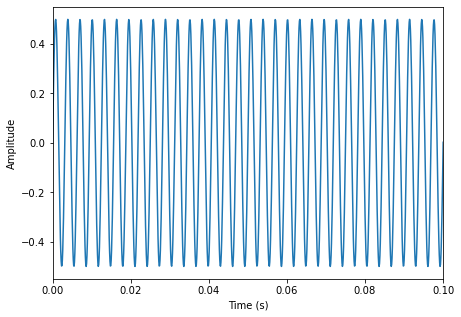

In [85]:
plot(time_orig, sound_320)
xlim([0, 0.1])
xlabel('Time (s)')
ylabel('Amplitude')

If we zoom in and enable markers, we can see the samples with a line drawn
between them

Text(0, 0.5, 'Amplitude')

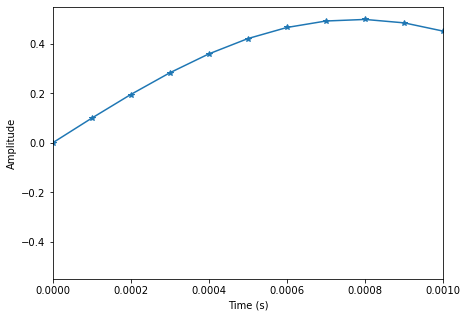

In [86]:
plot(time_orig, sound_320, '-*')
xlim([0, .001])
xlabel('Time (s)')
ylabel('Amplitude')

And what does this sinusoid sound like? **A word of advice: If you’re using headphones or earplugs, keep the volume down. The sound isn’t harmful in any way, but it can be annoying**

In [87]:
ipd.Audio(sound_320, rate=sample_rate_orig)

<!-- --- end solution of exercise --- -->

<!-- --- end exercise --- -->




<!-- --- begin exercise --- -->

## Exercise 3: The Sum of Sinusoids

We now make a another sound with a frequency of 440 Hz.

In [88]:
frequency_2 = 440
sound_440 = amplitude_orig * sin(2 * pi * frequency_2 * time_orig)  # pure sine wave at 440 Hz

Text(0, 0.5, 'Amplitude')

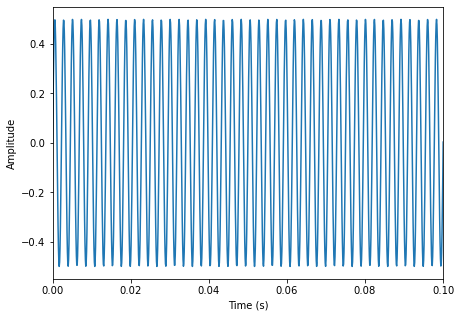

In [89]:
plot(time_orig, sound_440)
xlim([0, 0.1])
xlabel('Time (s)')
ylabel('Amplitude')

In [90]:
ipd.Audio(sound_440, rate=sample_rate_orig)

And then we make a new sound from the signal with a frequency of 320 Hz and signal with a frequency of 440 Hz simply by adding them together:

In [91]:
sound_sum = sound_440 + sound_320

You can listen to this new sound by running the cell below

In [92]:
ipd.Audio(sound_sum, rate=sample_rate_orig)

And plot it:

Text(0, 0.5, 'Amplitude')

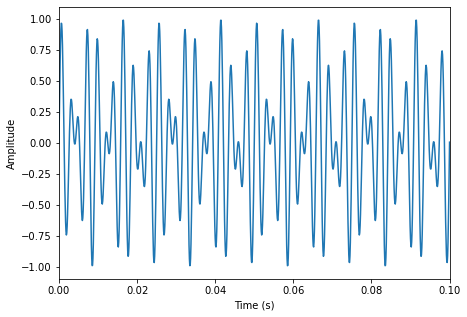

In [93]:
plot(time_orig, sound_sum)
xlim([0, .1])
xlabel('Time (s)')
ylabel('Amplitude')

**a)**
Explain why the signal of the new sound looks like this (think back to the video)

Answer:

## Exercise 4: Fourier transform, spectrograms and periodograms/power spectrums

Now we'll use the Fourier transform. Usually you will use a package (or other software) to perform this calculation for you, and that's also what we will do here. In the next cell the Fourier transform is applied to the sum of signals we constructed above. The result will be contained in the array `sound_frequency`.

In [94]:
sound_frequency_sum = librosa.stft(sound_sum)

A common way to visualize frequencies in a signal is to use a so-called spectrogram, which shows the
presence of the various frequencies at different times. This is what's plotted in the cell below.

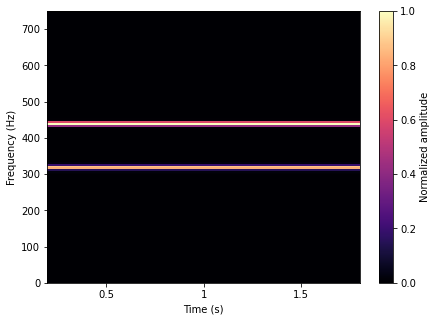

In [96]:
librosa.display.specshow(abs(sound_frequency_sum)/abs(sound_frequency_sum).max(), sr=sample_rate_orig, x_axis='time', y_axis='hz', vmin = 0)
ylim([0, 750])
xlim([.2, 1.8])
xlabel('Time (s)')
ylabel('Frequency (Hz)')
c = colorbar()
c.set_label('Normalized amplitude')

**b)** Explain where the two lines in this plot come from.

Answer:

Another way to visualize the strength of frequencies is with a periodogram, which is a type of power spectrum. This is shown next. `PSD` on the y-axis stands for "power spectrum density" and is a measure of how strongly a frequency is represented in the signal.

(100.0, 500.0)

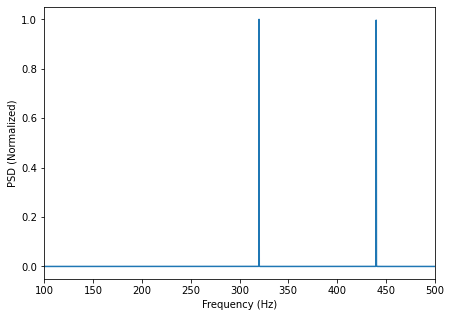

In [100]:
fig, psd_ax = plt.subplots()

frequency, psd = signal.periodogram(sound_sum, sample_rate_orig)
psd_ax.plot(frequency, psd/psd.max())
psd_ax.set_xlabel('Frequency (Hz)')
psd_ax.set_ylabel('PSD (Normalized)')
psd_ax.set_xlim([100, 500])

**c)** What's the main difference between a spectrogram and a periodogram? Hint: Look at the axes

Answer: 

Let's get back to the drummer and see what the spectrogram and periodogram looks like for the drum recording.

Since sound is usually made up of some amplitudes that are very large and
some very small, it can sometimes be hard to see the small ones together with
the large ones. We therefore take the logarithm of the amplitudes, which adjusts the scaling and also gives
us the amplitudes in the units Decibel (db).

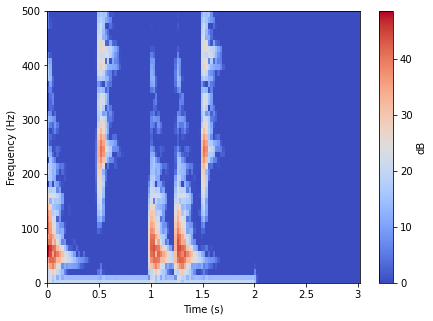

In [32]:
sound_frequency_drums = abs(librosa.stft(sound_drums))
sound_frequency_drums_db = librosa.amplitude_to_db(sound_frequency_drums)

librosa.display.specshow(sound_frequency_drums_db, sr=sample_rate_drums, x_axis='time', y_axis='hz', vmin = 0)
ylim([0, 500])
xlabel('Time (s)')
ylabel('Frequency (Hz)')
cb = colorbar()
cb.set_label('dB')

(10.0, 300.0)

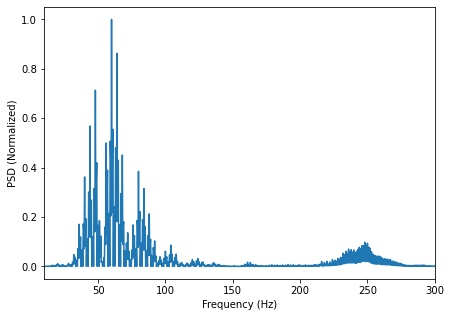

In [102]:
fig, psd_ax = subplots()

frequency, psd = signal.periodogram(sound_drums, sample_rate_drums)
psd_ax.plot(frequency, psd/psd.max())
psd_ax.set_xlabel('Frequency (Hz)')
psd_ax.set_ylabel('PSD (Normalized)')
psd_ax.set_xlim([10, 300])
#psd_ax.set_ylim([0, .002])

**d)** What do the two bumps in the periodogram correspond to? (You can view the peaks to the left as part of the same bump.)

Answer:

**e)** Why are the bumps more spread out for the drum recording than they were for the signal we constructed above?

Answer: 

<!-- --- end solution of exercise --- -->

<!-- --- end exercise --- -->


## Errors from Sub Sampling
Let's make the 440 Hz signal again, but reduce the `sampling_rate` to say 200

Text(0, 0.5, 'Amplitude')

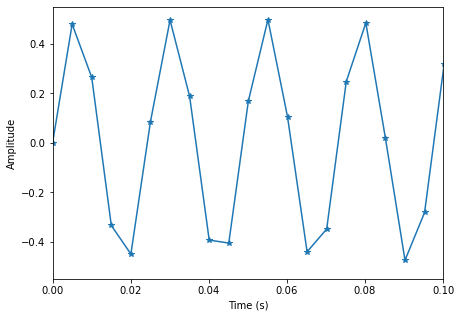

In [104]:
new_sample_rate = 200 # sample pr. second
duration = 2.0    # seconds
amplitude = 0.5
frequency_3 = 440 # Hz
n_samples = int(duration * new_sample_rate)
time_newSampRate = linspace(0, duration, n_samples) # time array
sound_440_newSampRate = amplitude * sin(2 * pi * frequency_3 * time_newSampRate)        # pure sine wave at 440 Hz

plot(time_newSampRate, sound_440_newSampRate, '-*')
xlim([0, 0.1])
xlabel('Time (s)')
ylabel('Amplitude')

/Users/atleeskelandrimehaug/opt/anaconda3/envs/gen_env/lib/python3.7/site-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=400
  n_fft, y.shape[-1]


Text(0, 0.5, 'Hz')

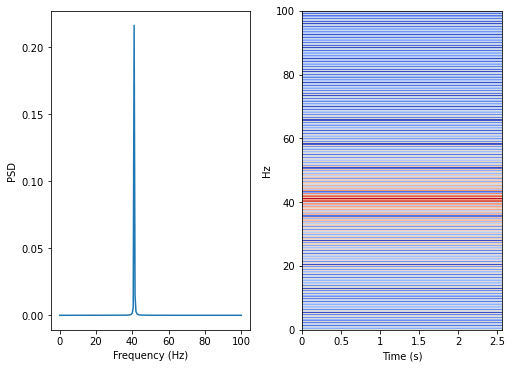

In [105]:
sound_frequency_newSampRate = abs(librosa.stft(sound_440_newSampRate))
sound_frequency_db_newSampRate = librosa.amplitude_to_db(sound_frequency_newSampRate)

fig, (psd_ax, spec_ax) = subplots(1, 2, constrained_layout = True)

frequency, psd = signal.periodogram(sound_440_newSampRate, new_sample_rate)
psd_ax.plot(frequency, psd)
psd_ax.set_xlabel('Frequency (Hz)')
psd_ax.set_ylabel('PSD')
#psd_ax.set_xlim([0, 500])
#psd_ax.set_xlim([1e-12, 1e-0])

librosa.display.specshow(sound_frequency_db_newSampRate, sr=new_sample_rate, x_axis='time', y_axis='hz', ax=spec_ax)
#spec_ax.set_ylim([0, 100])
spec_ax.set_xlabel('Time (s)')
spec_ax.set_ylabel('Hz')

In [106]:
print('Peak frequency is', frequency[psd == psd.max()], 'Hz')

Peak frequency is [41.] Hz


<!-- --- begin exercise --- -->

## Exercise 5: Discussion

What happened here? Why does our analysis say that the signal is a sinusoid
at 41 Hz, when we specifically made it to be at 440 Hz?

**a)** Run the two cells after the "answer cell" below and use the plots to explain what happened. Note: The sound can be hard to hear, but it's there.

Answer:

In [107]:
ipd.Audio(sound_440_newSampRate, rate=new_sample_rate)

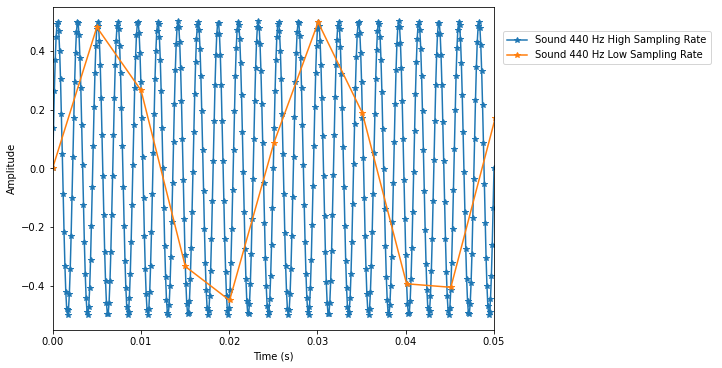

In [118]:
fig, ax = subplots(ncols = 1, figsize = (7, 5), sharey = True, constrained_layout = True)

ax.plot(time_orig, sound_440, '*-', label = 'Sound 440 Hz High Sampling Rate')
ax.plot(time_newSampRate, sound_440_newSampRate, '*-', label = 'Sound 440 Hz Low Sampling Rate')

ax.set_xlim([0, 0.05])

ax.set_xlabel('Time (s)')

ax.set_ylabel('Amplitude')

fig.legend(bbox_to_anchor = (1.42, 0.95))




<!-- --- begin exercise --- -->

## Exercise 6: Finding a Good Sampling Frequency

Here we will seek empirically for a `sample_rate` that does not make the signal
appear to be at the wrong frequency.

Increase the `sample_rate` variable in the cell below from 200 Hz up to 1000 Hz and pay attention to the periodogram. When do you get the correct peak frequency (440 Hz).

**a)** What's the lowest sample rate you need to use to get the correct answer for the peak frequency?

Answer:

**b)** What's the relation between the peak frequency and the sample rate you found in **a)**?

Answer:

Peak frequency is [440.] Hz


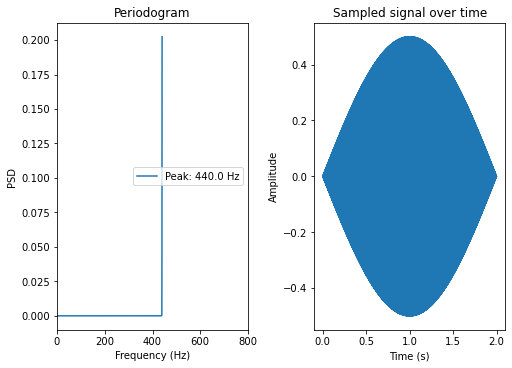

In [119]:
sample_rate = 880 # sample pr. second

duration = 2.0    # seconds
amplitude = 0.5
frequency_4 = 440
n_samples = int(duration * sample_rate)
time = linspace(0, duration, n_samples) # time variable
sound_440 = amplitude * sin(2 * pi * frequency_4 * time) # pure sine wave at 440 Hz
frequency, psd = signal.periodogram(sound_440, sample_rate)

fig, (psd_ax, amp_ax) = subplots(1, 2, constrained_layout = True)

amp_ax.plot(time, sound_440)
amp_ax.set_xlabel('Time (s)')
amp_ax.set_ylabel('Amplitude')
amp_ax.set_title('Sampled signal over time')


peak_freq = frequency[psd == psd.max()]
psd_ax.plot(frequency, psd, label='Peak: {} Hz'.format(float(peak_freq)))
psd_ax.set_title('Periodogram')
psd_ax.set_xlabel('Frequency (Hz)')
psd_ax.set_ylabel('PSD')
psd_ax.set_xlim([0, 800])
psd_ax.legend()

peak_frequency = frequency[psd == psd.max()]
print('Peak frequency is', peak_frequency, 'Hz')

<!-- --- end solution of exercise --- -->

<!-- Closing remarks for this Exercise -->

### Remarks

When the sampling rate is at its minimum in order to retain the correct
frequency of the signal, the signal still looks distorted when plotted in time.
However, there is no loss of information, which can be seen from the periodogram.
This is weird. The signal looks messed up, but it's actually not.

This is because we know it is a sinusoid, therefore we may use that information
when interpolating between the lines. That is, we know that the signal is a sinusoid, and we know what its frequency is supposed to be, so we don't need to draw it as we did in the plot above - as lines between the sampled dots - we can construct a new sinusoid with more points and with that frequency instead. This is illustrated in the next cell. 

This also applies when the original signal itself is not a sinusoid, but rather, a ramp, or a boxcar function (a square), for example. This goes back to the fact that any continuous signal, even if it is a square, can be represented as a sum of sinusoids. So even though the original signal itself isn't sinusoidal, the components used in its reconstruction are. And this fact together with knowing their frequencies is all we need to reconstruct the signal without loss of information.

And as we will discuss below, there is only one sinusoid that fit as long as the sampling rate is double that of the highest frequency. This is called the **Nyquist-Shannon sampling theorem** and this is a very important concept in signal analysis.

Text(0.5, 1.0, 'Reconstructed 440 Hz sound')

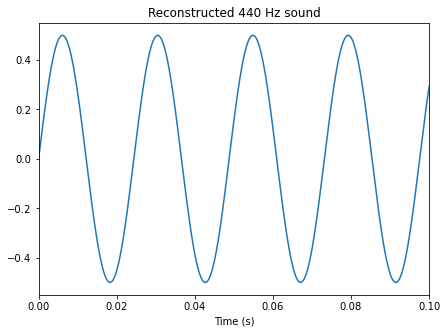

In [44]:
# Adding points in between measured points (this is called interpolation)
npoints = 100000
time_reconstructed_sound_440 = linspace(0, duration, npoints)


reconstructed_sound_440 = amplitude * sin(2 * pi * peak_frequency * time_reconstructed_sound_440) # pure sine wave at 440 Hz

fig, ax = subplots()

ax.plot(time_reconstructed_sound_440, reconstructed_sound_440)
ax.set_xlim([0, 0.1])
ax.set_xlabel('Time (s)')
ax.set_title('Reconstructed 440 Hz sound')

## Why this relation between sampling rate and signal frequency
The reasoning goes like this:
1. A signal can be completely described by a series of sinusoids at different
frequencies (Fourier series)
2. When sampling a signal, the sinusoid with the highest frequency gets the fewest samples pr period.
3. If we can reconstruct the sinusoid with the highest frequency, we can
reconstruct the lower frequencies as well.
4. If you have 2 measured points (or more) per period you can reconstruct a
sinusoid.

This will give you a sampling frequency that is twice than that of the highest
frequency in the signal you measure.

If we plot ten periods of the "real" 440 Hz signal overlaid with the low
sampling version, we can see that the blue points fit exactly on the orange
line. It can further be shown that in the range [0, 440] Hz, this is the only
line that fits exactly.

(0.22727272727272727, 0.25)

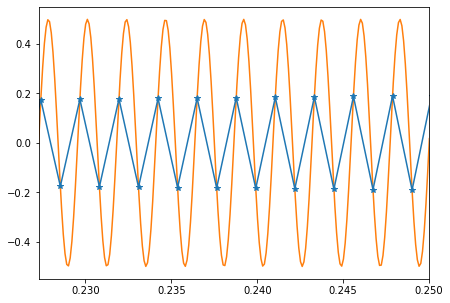

In [41]:
duration = 2.0    # seconds
amplitude = 0.5

frequency_real = 440
sample_rate_real = 10000 # sample pr. second
n_samples_real = int(duration * sample_rate_real)
time_real = linspace(0, duration, n_samples_real) # time variable
sound_real = amplitude * sin(2 * pi * frequency_real * time_real) # pure sine wave at 440 Hz


frequency_low = 440
sample_rate_low = 880 # sample pr. second
n_samples_low = int(duration * sample_rate_low)
time_low = linspace(0, duration, n_samples_low) # time variable
sound_low = amplitude * sin(2 * pi * frequency_low * time_low) # pure sine wave at 440 Hz

plot(time_low, sound_low, '-*', zorder=1)
plot(time_real, sound_real, zorder=0)
xlim([100 / frequency_low, 110 / frequency_low])

<!-- --- begin exercise --- -->

## Exercise 7: Practical consquences

You measure the heart rate from a rat, the maximum heart rate you can think of
is 300 beats/min.

What sampling rate would you choose in order to be sure to measure the
correct heart rate? Give the answer in Hz.

<!-- --- end exercise --- -->

Answer: